**1. Get data**

**2. Exploration**
    
    head, shape, info
    columns - rename? 
    dtypes - change formats?
    nulls - drop nulls?
    drop columns?
    
    numerical variables
        continuous/ discrete?
        plot distributions
        plot outliers - decide
        correlation matrix
    
    categorical variables
        plot
        value counts
        contingency tables
        
    get final dataset before jumping into the model
        
**3. Prepare train and test data set**


## DATA PREPARATION

### Get basic info about the data

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import make_regression
import datetime
from time import time
import re
import math
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [70]:
pd.options.display.float_format = '{:,.4f}'.format

In [71]:
data = pd.read_csv('yellow_tripdata_2019-08.csv')
data.head()
data.shape

C:\Users\besca\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0000,2019-08-01 00:09:46,2019-08-01 00:10:36,1.0000,0.0000,1.0000,N,145,145,2.0000,2.5000,0.5000,0.5000,0.0000,0.0000,0.3000,3.8000,0.0000
1,1.0000,2019-08-01 00:30:47,2019-08-01 00:31:39,1.0000,0.0000,1.0000,N,145,145,2.0000,2.5000,0.5000,0.5000,0.0000,0.0000,0.3000,3.8000,0.0000
2,1.0000,2019-08-01 00:44:50,2019-08-01 00:46:32,1.0000,7.1000,1.0000,N,145,145,2.0000,3.0000,0.5000,0.5000,0.0000,0.0000,0.3000,4.3000,0.0000
3,1.0000,2019-08-01 00:57:16,2019-08-01 00:58:20,1.0000,0.0000,1.0000,N,145,145,2.0000,3.0000,0.5000,0.5000,0.0000,0.0000,0.3000,4.3000,0.0000
4,1.0000,2019-08-01 00:59:18,2019-08-01 01:04:13,1.0000,0.0000,1.0000,N,145,145,2.0000,4.5000,0.5000,0.5000,0.0000,0.0000,0.3000,5.8000,0.0000


(6073357, 18)

In [72]:
# data['PULocationID'].value_counts()
# data['DOLocationID'].value_counts()

### Formatting

In [73]:
data = data.astype({'tpep_pickup_datetime':'datetime64','tpep_dropoff_datetime':'datetime64','RatecodeID':'object','payment_type':'object'})
data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                     object
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [74]:
# trip_distance: convert miles to km
def convert_to_km(x):
    conversion_factor = 0.62137119
    return x/conversion_factor

In [75]:
data['trip_distance'] = data['trip_distance'].apply(convert_to_km)

#### Add column for trip duration in minutes

In [76]:
# Add trip duration column

data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).astype('timedelta64[m]')
data['trip_duration'].describe()
data.head()

count   6,073,357.0000
mean           17.4935
std            73.4487
min       -17,199.0000
25%             6.0000
50%            11.0000
75%            18.0000
max        36,501.0000
Name: trip_duration, dtype: float64

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,1.0000,2019-08-01 00:09:46,2019-08-01 00:10:36,1.0000,0.0000,1.0,N,145,145,2.0,2.5000,0.5000,0.5000,0.0000,0.0000,0.3000,3.8000,0.0000,0.0000
1,1.0000,2019-08-01 00:30:47,2019-08-01 00:31:39,1.0000,0.0000,1.0,N,145,145,2.0,2.5000,0.5000,0.5000,0.0000,0.0000,0.3000,3.8000,0.0000,0.0000
2,1.0000,2019-08-01 00:44:50,2019-08-01 00:46:32,1.0000,11.4263,1.0,N,145,145,2.0,3.0000,0.5000,0.5000,0.0000,0.0000,0.3000,4.3000,0.0000,1.0000
3,1.0000,2019-08-01 00:57:16,2019-08-01 00:58:20,1.0000,0.0000,1.0,N,145,145,2.0,3.0000,0.5000,0.5000,0.0000,0.0000,0.3000,4.3000,0.0000,1.0000
4,1.0000,2019-08-01 00:59:18,2019-08-01 01:04:13,1.0000,0.0000,1.0,N,145,145,2.0,4.5000,0.5000,0.5000,0.0000,0.0000,0.3000,5.8000,0.0000,4.0000


### Columns

In [77]:
data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                     object
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
trip_duration                   float64
dtype: object

#### Drop non useful ones

In [78]:
data.drop(['VendorID','mta_tax','improvement_surcharge','store_and_fwd_flag','congestion_surcharge'], axis=1, inplace=True)
data.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                      int64
DOLocationID                      int64
payment_type                     object
fare_amount                     float64
extra                           float64
tip_amount                      float64
tolls_amount                    float64
total_amount                    float64
trip_duration                   float64
dtype: object

#### According to the information about the data, the tips column only corresponds to trips that were paid with credit card. For this reason, and since our app will also work with credit card, we will erase all the trips that were not payed by credit card

In [79]:
data = data.loc[data['payment_type'] == 1]
data.shape

(4216488, 14)

#### Erase values that do not correspond to year 2019 and month August

In [80]:
data = data.loc[(data['tpep_pickup_datetime'].dt.year == 2019) & (data['tpep_pickup_datetime'].dt.month == 8)]
data = data.loc[(data['tpep_dropoff_datetime'].dt.year == 2019) & (data['tpep_dropoff_datetime'].dt.month == 8)]
data.shape

(4214783, 14)

#### Also, we remove all trips where the recorded distance, fare amount, total amount or passenger count were 0, and the trips with a time duration less or equal to 0

In [81]:
# try function
data.loc[data['trip_distance'] == 0].shape
data.loc[data['fare_amount'] == 0].shape
data.loc[data['passenger_count'] == 0].shape
data.loc[data['trip_duration'] <= 0].shape

(39209, 14)

(677, 14)

(75936, 14)

(29873, 14)

In [82]:
data = data.loc[(data['trip_distance'] != 0) & (data['fare_amount'] != 0) & (data['passenger_count'] != 0) & (data['trip_duration'] > 0)]
data.shape

(4090903, 14)

#### Add column for average trip speed (we assume that if it is lower then 40km/h it took too long)

In [83]:
data['trip_average_speed'] = (data['trip_distance'] / (data['trip_duration']/60)).astype('float64')

#### Add column to convert tip_amount to percentage

In [84]:
data['tip_percentage'] = ((data['tip_amount'] / data['total_amount'])*100).astype('float64')

#### Add column to check the part of the day in which the trip has been made 

In [85]:
data['pickup_time'],data['pickup_date']= data['tpep_pickup_datetime'].apply(lambda x:x.time()), data['tpep_pickup_datetime'].apply(lambda x:x.date())

In [86]:
def day_part(x):
    if datetime.time(6,0,0) < x < datetime.time(11, 29, 59):
        return 'Morning'
    elif datetime.time(11, 30, 0) < x < datetime.time(14, 29, 59):
        return 'Midday'
    elif datetime.time(14, 30, 0) < x < datetime.time(17, 59, 59):
        return 'Afternoon'
    elif datetime.time(18, 0, 0) < x < datetime.time(20, 59, 59):
        return 'Evening'
    else:
        return 'Night'

In [87]:
data['day_part'] = data['pickup_time'].apply(day_part)

In [88]:
# data['day_part'].value_counts()

#### Add column to check if the trip was made on a weekday or weekend 

In [89]:
def weekday(x):
    if datetime.datetime.weekday(x) == 1 :
        return 'Monday'
    elif datetime.datetime.weekday(x) == 2 :
        return 'Tuesday'
    elif datetime.datetime.weekday(x) == 3 :
        return 'Wednesday'
    elif datetime.datetime.weekday(x) == 4 :
        return 'Thursday'
    elif datetime.datetime.weekday(x) == 5 :
        return 'Friday'
    elif datetime.datetime.weekday(x) == 6 :
        return 'Saturday'
    else:
        return 'Sunday'

In [90]:
data['weekday'] = data['tpep_pickup_datetime'].apply(weekday)

In [91]:
# data['weekday'].value_counts()

#### Add additional column to categorise passenger load

In [92]:
def encode_passenger(x):
    if x == 1.00:
        return 'Individual passenger'
    elif (x == 2.00) | (x==3.00):
        return 'Small group'
    else:
        return 'Big group'

In [93]:
data['passenger_load'] = list(map(encode_passenger, data['passenger_count']))

#### Add additional column to categorise passenger load

In [94]:
def encode_rate(x):
    if x == 1.0:
        return 'Standard rate'
    elif x == 2.0:
        return 'JFK Airport'
    elif x == 3.0:
        return 'Newark'
    elif x == 4.0:
        return 'Nassau or Westchester'
    else:
        return 'Negotiated fare'

In [95]:
data['ratecodeID'] = list(map(encode_rate, data['RatecodeID']))

### NaN values

In [96]:
# no null values
data.isnull().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
tip_amount               0
tolls_amount             0
total_amount             0
trip_duration            0
trip_average_speed       0
tip_percentage           0
pickup_time              0
pickup_date              0
day_part                 0
weekday                  0
passenger_load           0
ratecodeID               0
dtype: int64

### Numerical variables

#### First, we will remove the location columns, as they have no relevance in a non-spatial algorithm

In [97]:
numerical = data.select_dtypes(np.number)
numerical.drop(['PULocationID','DOLocationID'], axis=1, inplace=True)

C:\Users\besca\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Exploration of the variables

In [98]:
numerical.dtypes
numerical.describe()

passenger_count       float64
trip_distance         float64
fare_amount           float64
extra                 float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
trip_duration         float64
trip_average_speed    float64
tip_percentage        float64
dtype: object

,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,trip_duration,trip_average_speed,tip_percentage
count,"4,090,903.0000","4,090,903.0000","4,090,903.0000","4,090,903.0000","4,090,903.0000","4,090,903.0000","4,090,903.0000","4,090,903.0000","4,090,903.0000","4,090,903.0000"
mean,1.5840,5.1463,13.4394,1.1621,3.0978,0.4396,20.4832,17.2213,20.4115,14.9544
std,1.1976,6.5504,12.0149,1.2670,2.9393,1.7512,15.4389,68.0734,12.8131,5.1232
min,1.0000,0.0161,-31.0000,-21.2200,-51.9300,-6.1200,-93.3500,1.0000,0.0007,0.0000
25%,1.0000,1.7220,6.5000,0.0000,1.7600,0.0000,12.3000,7.0000,13.3116,13.0435
50%,1.0000,2.8324,9.5000,0.5000,2.3600,0.0000,15.3600,11.0000,17.9327,16.6621
75%,2.0000,5.2304,15.0000,2.5000,3.4600,0.0000,21.6200,18.0000,24.5264,16.6667
max,9.0000,493.9077,950.0000,17.5000,500.0000,66.5000,960.8000,"7,283.0000","4,557.6622",99.5591


In [99]:
# remove negative sign from values

numerical = abs(numerical)
numerical.describe()

,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,trip_duration,trip_average_speed,tip_percentage
count,"4,090,903.0000","4,090,903.0000","4,090,903.0000","4,090,903.0000","4,090,903.0000","4,090,903.0000","4,090,903.0000","4,090,903.0000","4,090,903.0000","4,090,903.0000"
mean,1.5840,5.1463,13.4395,1.1621,3.0979,0.4396,20.4833,17.2213,20.4115,14.9544
std,1.1976,6.5504,12.0148,1.2670,2.9393,1.7512,15.4387,68.0734,12.8131,5.1232
min,1.0000,0.0161,0.0100,0.0000,0.0000,0.0000,0.4700,1.0000,0.0007,0.0000
25%,1.0000,1.7220,6.5000,0.0000,1.7600,0.0000,12.3000,7.0000,13.3116,13.0435
50%,1.0000,2.8324,9.5000,0.5000,2.3600,0.0000,15.3600,11.0000,17.9327,16.6621
75%,2.0000,5.2304,15.0000,2.5000,3.4600,0.0000,21.6200,18.0000,24.5264,16.6667
max,9.0000,493.9077,950.0000,21.2200,500.0000,66.5000,960.8000,"7,283.0000","4,557.6622",99.5591


In [100]:
# data.loc[data['tip_amount']==500.0000]

In [101]:
# for x in numerical:
#     numerical[x].value_counts();

Text(0.5, 0.98, 'Distribution of numerical variables')

<AxesSubplot:xlabel='passenger_count'>

<AxesSubplot:xlabel='trip_distance'>

<AxesSubplot:xlabel='fare_amount'>

<AxesSubplot:xlabel='extra'>

<AxesSubplot:xlabel='tip_amount'>

<AxesSubplot:xlabel='tolls_amount'>

<AxesSubplot:xlabel='trip_duration'>

<AxesSubplot:xlabel='trip_average_speed'>

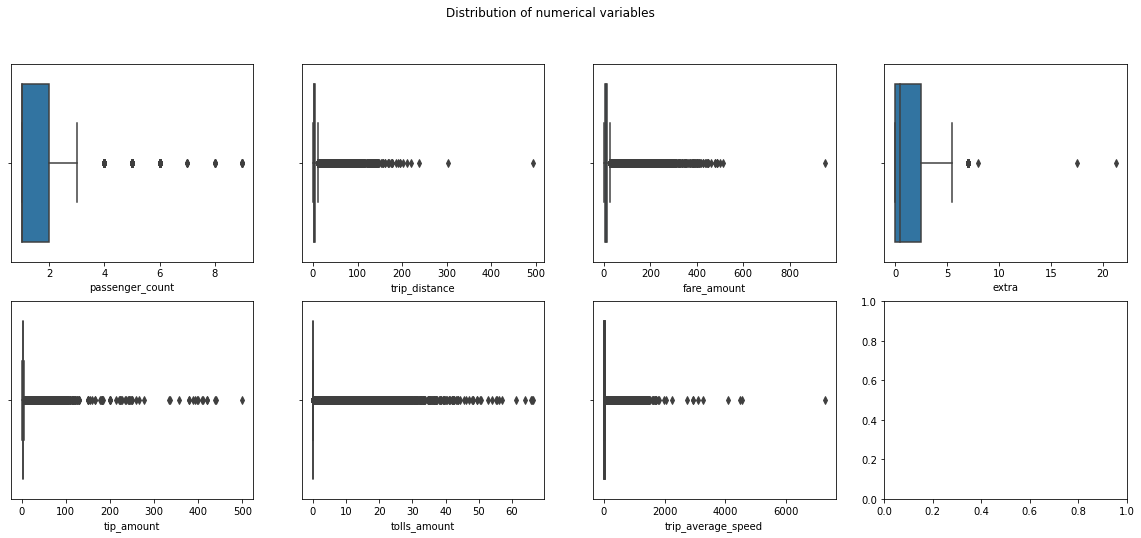

In [102]:
fig, axes = plt.subplots(2,4,  figsize=(20, 8))

fig.suptitle('Distribution of numerical variables')

sns.boxplot(ax=axes[0,0],data= numerical, x='passenger_count')
sns.boxplot(ax=axes[0,1],data= numerical, x= 'trip_distance')
sns.boxplot(ax=axes[0,2],data= numerical, x= 'fare_amount')
sns.boxplot(ax=axes[0,3],data= numerical, x= 'extra')
sns.boxplot(ax=axes[1,0],data= numerical, x= 'tip_amount')
sns.boxplot(ax=axes[1,1],data= numerical, x= 'tolls_amount')
sns.boxplot(ax=axes[1,2],data= numerical, x= 'trip_duration')
sns.boxplot(ax=axes[1,2],data= numerical, x= 'trip_average_speed')



<!-- We are going to erase all rows where one of the following conditions is not met:
* trip_distance > 40
fare_amount -->



#### Dealing with outliers

Since we have a huge amount of data (4,101,959 rows) we have decided not to drop any outliers as their overall impact on the model is likely to be really low. FAILED. LET'S REMOVE OUTLIERS

Removing outliers I get a score of 0.39....

C:\Users\besca\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_distance'>

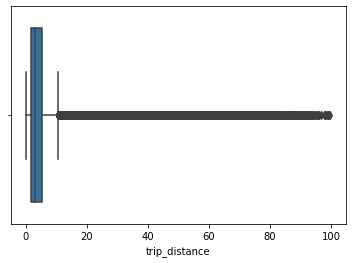

In [103]:
# trip_distance
numerical = numerical[(numerical['trip_distance']<100)]
sns.boxplot(numerical['trip_distance'])
plt.show()

C:\Users\besca\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fare_amount'>

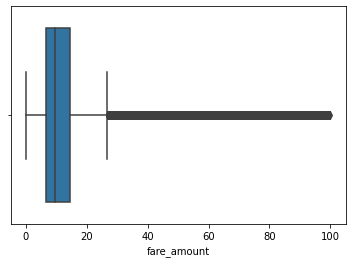

In [104]:
# fare_amount
numerical = numerical[(numerical['fare_amount']<100)]
sns.boxplot(numerical['fare_amount'])
plt.show()

C:\Users\besca\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='tip_amount'>

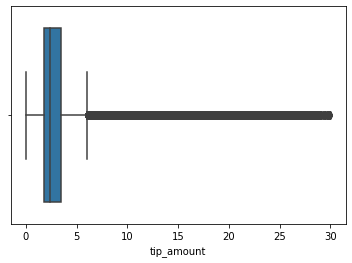

In [105]:
# tip_amount
numerical = numerical[(numerical['tip_amount']<30)]
sns.boxplot(numerical['tip_amount'])
plt.show()

C:\Users\besca\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_duration'>

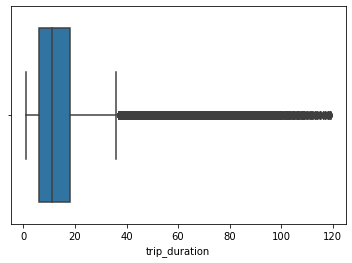

In [106]:
# trip_duration
numerical = numerical[(numerical['trip_duration']<120)]
sns.boxplot(numerical['trip_duration'])
plt.show()

C:\Users\besca\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_average_speed'>

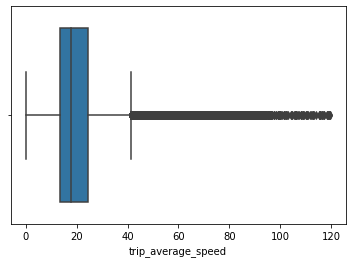

In [107]:
# trip_average_speed
numerical = numerical[(numerical['trip_average_speed']<120)]
sns.boxplot(numerical['trip_average_speed'])
plt.show()

C:\Users\besca\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='tip_percentage'>

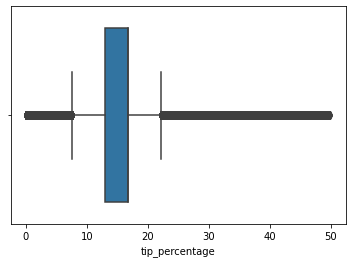

In [108]:
# tip_percentage
numerical = numerical[(numerical['tip_percentage']<50)]
sns.boxplot(numerical['tip_percentage'])
plt.show()

In [109]:
# # tolls_amount
# numerical = numerical[(numerical['tolls_amount']<5)]
# sns.boxplot(numerical['tolls_amount'])
# plt.show()

In [110]:
numerical.shape

(4074272, 10)

In [111]:
numerical.head()
numerical.describe()

,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,trip_duration,trip_average_speed,tip_percentage
5,1.0000,11.7482,28.0000,3.0000,7.9500,0.0000,39.7500,34.0000,20.7321,20.0000
9,1.0000,10.4607,25.0000,3.0000,4.3200,0.0000,33.1200,31.0000,20.2466,13.0435
10,1.0000,3.3796,9.5000,3.0000,2.0000,0.0000,15.3000,11.0000,18.4343,13.0719
11,1.0000,0.9978,4.5000,0.5000,2.4900,0.0000,10.7900,2.0000,29.9338,23.0769
15,1.0000,2.8968,9.5000,3.0000,2.6500,0.0000,15.9500,11.0000,15.8008,16.6144


,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,trip_duration,trip_average_speed,tip_percentage
count,"4,074,272.0000","4,074,272.0000","4,074,272.0000","4,074,272.0000","4,074,272.0000","4,074,272.0000","4,074,272.0000","4,074,272.0000","4,074,272.0000","4,074,272.0000"
mean,1.5833,5.0952,13.3034,1.1651,3.0651,0.4294,20.3067,13.8913,20.3933,14.9405
std,1.1969,6.3394,11.2091,1.2677,2.5595,1.7009,14.4915,11.0380,10.5383,4.9944
min,1.0000,0.0161,0.0100,0.0000,0.0000,0.0000,0.4700,1.0000,0.0098,0.0000
25%,1.0000,1.7059,6.5000,0.0000,1.7600,0.0000,12.3000,6.0000,13.3576,13.0435
50%,1.0000,2.8324,9.5000,0.5000,2.3600,0.0000,15.3600,11.0000,17.9327,16.6621
75%,2.0000,5.2143,14.5000,2.5000,3.4600,0.0000,21.6000,18.0000,24.5264,16.6667
max,9.0000,95.4341,99.9900,21.2200,29.9800,66.5000,174.5400,119.0000,119.7352,49.8982


#### Correlation matrix

<Figure size 560x560 with 0 Axes>

<AxesSubplot:>

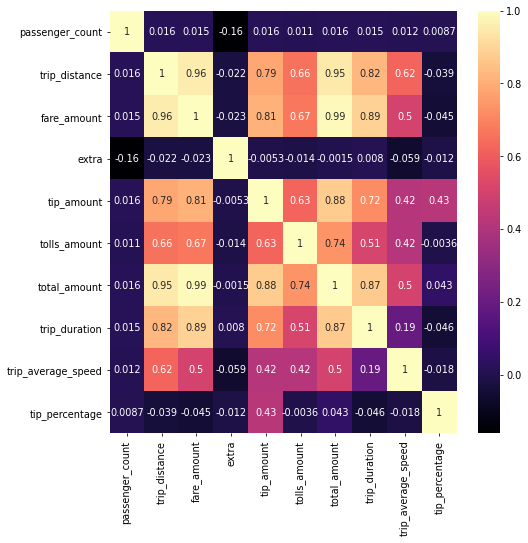

In [112]:
# check for multicollinearity
corr_matrix = numerical.corr()
# corr_matrix;
plt.figure(figsize= (8,8), dpi= 70)
corr_matrix = numerical.corr()
sns.heatmap(corr_matrix, annot=True, cmap= 'magma')

In [113]:
numerical = numerical.drop(['fare_amount','total_amount','tip_percentage'], axis = 1)

<Figure size 560x560 with 0 Axes>

<AxesSubplot:>

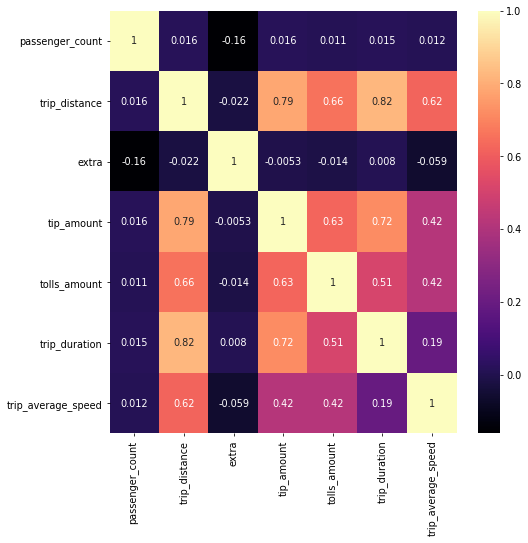

In [114]:
# check for multicollinearity
corr_matrix = numerical.corr()
# corr_matrix;
plt.figure(figsize= (8,8), dpi= 70)
corr_matrix = numerical.corr()
sns.heatmap(corr_matrix, annot=True, cmap= 'magma')

In [115]:
numerical.isnull().sum()
numerical.shape

passenger_count       0
trip_distance         0
extra                 0
tip_amount            0
tolls_amount          0
trip_duration         0
trip_average_speed    0
dtype: int64

(4074272, 7)

### Categorical variables

In [116]:
categorical = data.select_dtypes(np.object)

In [117]:
categorical = data[['ratecodeID','day_part','weekday','passenger_load']]

In [118]:
categorical.value_counts()

ratecodeID             day_part  weekday    passenger_load      
Standard rate          Morning   Wednesday  Individual passenger    137440
                       Night     Friday     Individual passenger    125132
                                 Wednesday  Individual passenger    124770
                       Morning   Thursday   Individual passenger    119150
                       Night     Thursday   Individual passenger    114299
                                                                     ...  
Nassau or Westchester  Evening   Saturday   Big group                    4
                       Midday    Thursday   Big group                    4
                       Evening   Tuesday    Big group                    4
                       Morning   Tuesday    Big group                    3
                       Evening   Sunday     Big group                    2
Length: 525, dtype: int64

In [119]:
categorical.isnull().sum()
categorical.shape

ratecodeID        0
day_part          0
weekday           0
passenger_load    0
dtype: int64

(4090903, 4)

### Get final dataset for our model

In [120]:
numerical.reset_index(drop=True, inplace=True)
categorical.reset_index(drop=True, inplace=True)

In [121]:
# final_data = pd.concat([numerical,categorical], axis=1)
# final_data.shape
# final_data.head()
# final_data.isnull().sum()

# we need to merge beacuse we got rid of many outliers so now the numerical and categorical rows don't match
final_data = pd.merge(numerical,categorical,left_index=True, right_index=True)
final_data.shape
final_data.head()

(4074272, 11)

,passenger_count,trip_distance,extra,tip_amount,tolls_amount,trip_duration,trip_average_speed,ratecodeID,day_part,weekday,passenger_load
0,1.0000,11.7482,3.0000,7.9500,0.0000,34.0000,20.7321,Standard rate,Night,Wednesday,Individual passenger
1,1.0000,10.4607,3.0000,4.3200,0.0000,31.0000,20.2466,Standard rate,Night,Wednesday,Individual passenger
2,1.0000,3.3796,3.0000,2.0000,0.0000,11.0000,18.4343,Standard rate,Night,Wednesday,Individual passenger
3,1.0000,0.9978,0.5000,2.4900,0.0000,2.0000,29.9338,Standard rate,Night,Wednesday,Individual passenger
4,1.0000,2.8968,3.0000,2.6500,0.0000,11.0000,15.8008,Standard rate,Night,Wednesday,Individual passenger


In [122]:
# final_data.to_csv('taxi_model.csv', index = False)

## Export data for visualization

In [123]:
# we run everything again and avoided dropping fare_amount and trip_distance

# rest = data[['PULocationID','DOLocationID','tpep_pickup_datetime','tpep_dropoff_datetime','pickup_time','pickup_date']]

In [124]:
# rest.shape

In [125]:
# final_data.reset_index(drop=True, inplace=True)
# rest.reset_index(drop=True, inplace=True)

In [126]:
# data_visual = pd.merge(final_data,rest,left_index=True, right_index=True)
# data_visual.shape
# data_visual.head()

In [127]:
# data_visual = data_visual.sample(n=100000, random_state=1)
# data_visual.shape

In [128]:
# data_visual.to_csv('taxi_visual.csv', index = False)

## DATA TRANSFORMATION

#### Separate x/y

In [129]:
y = final_data['tip_amount']
X= final_data.drop(['tip_amount'], axis=1)
y.shape
X.shape

(4074272,)

(4074272, 10)

#### Train, test split 

In [130]:
# Splitting into train set and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
X_train.head()

,passenger_count,trip_distance,extra,tolls_amount,trip_duration,trip_average_speed,ratecodeID,day_part,weekday,passenger_load
132878,1.0000,6.1155,3.0000,0.0000,26.0000,14.1127,Standard rate,Evening,Wednesday,Individual passenger
4062524,1.0000,1.8186,0.5000,0.0000,5.0000,21.8227,Standard rate,Evening,Friday,Individual passenger
1658680,1.0000,2.0600,0.0000,0.0000,10.0000,12.3598,Standard rate,Morning,Monday,Individual passenger
1841722,1.0000,1.4323,0.0000,0.0000,6.0000,14.3232,Standard rate,Midday,Tuesday,Individual passenger
3261365,1.0000,17.1556,0.0000,6.1200,22.0000,46.7880,Standard rate,Night,Saturday,Individual passenger


### Train dataset

#### Select numerical variables in the train

In [131]:
numerical_train = X_train.select_dtypes(include = np.number)
numerical_train.shape

(3055704, 6)

##### Apply transformation to numericals 

In [132]:
# scaling standard scaler: make data normal distributed with mean=0 and std=1
transformer = StandardScaler().fit(numerical_train)
num_standardized = transformer.transform(numerical_train)
print(num_standardized.shape)
train_num_stand = pd.DataFrame(num_standardized, columns=numerical_train.columns)
train_num_stand.describe()

(3055704, 6)


,passenger_count,trip_distance,extra,tolls_amount,trip_duration,trip_average_speed
count,"3,055,704.0000","3,055,704.0000","3,055,704.0000","3,055,704.0000","3,055,704.0000","3,055,704.0000"
mean,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-0.4871,-0.8012,-0.9190,-0.2522,-1.1682,-1.9346
25%,-0.4871,-0.5345,-0.9190,-0.2522,-0.7150,-0.6679
50%,-0.4871,-0.3567,-0.5243,-0.2522,-0.2618,-0.2330
75%,0.3485,0.0167,1.0542,-0.2522,0.3727,0.3929
max,6.1979,14.2587,15.8289,38.8966,9.5273,9.4316


#### Select categorical variables in the train and test

In [133]:
categorical_train = X_train.select_dtypes(include = np.object)
categorical_train.shape

(3055704, 4)

##### Encode categoricals

In [134]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(categorical_train)
train_onehot = encoder.transform(categorical_train).toarray()
enc = [columname for sublist in encoder.categories_ for columname in sublist]
train_onehot = pd.DataFrame(train_onehot,columns=enc)
train_onehot.shape
train_onehot.head()

(3055704, 20)

,JFK Airport,Nassau or Westchester,Negotiated fare,Newark,Standard rate,Afternoon,Evening,Midday,Morning,Night,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Big group,Individual passenger,Small group
0,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000


#### Get final train dataset

In [135]:
numerical_train.reset_index(drop=True, inplace=True)
train_onehot.reset_index(drop=True, inplace=True)

In [136]:
X_train_preproc = pd.concat([train_num_stand,train_onehot], axis= 1)
X_train_preproc.shape
X_train_preproc.isnull().sum()

(3055704, 26)

passenger_count          0
trip_distance            0
extra                    0
tolls_amount             0
trip_duration            0
trip_average_speed       0
JFK Airport              0
Nassau or Westchester    0
Negotiated fare          0
Newark                   0
Standard rate            0
Afternoon                0
Evening                  0
Midday                   0
Morning                  0
Night                    0
Friday                   0
Monday                   0
Saturday                 0
Sunday                   0
Thursday                 0
Tuesday                  0
Wednesday                0
Big group                0
Individual passenger     0
Small group              0
dtype: int64

### VALIDATION

#### Select numerical variables in the test

In [137]:
numerical_test = X_test.select_dtypes(include = np.number)
numerical_test.shape

(1018568, 6)

##### Apply transformation to numericals 

In [138]:
# scaling standard scaler: make data normal distributed with mean=0 and std=1
test_num_standardized = transformer.transform(numerical_test)
print(test_num_standardized.shape)
test_num_stand = pd.DataFrame(test_num_standardized, columns=numerical_test.columns)

(1018568, 6)


#### Select categorical variables in the test

In [139]:
categorical_test = X_test.select_dtypes(include = np.object)
categorical_test.shape

(1018568, 4)

##### Encode categoricals

In [140]:
test_onehot = encoder.transform(categorical_test).toarray()
enc = [columname for sublist in encoder.categories_ for columname in sublist]
test_onehot = pd.DataFrame(test_onehot,columns=enc)
test_onehot.shape
test_onehot.head()

(1018568, 20)

,JFK Airport,Nassau or Westchester,Negotiated fare,Newark,Standard rate,Afternoon,Evening,Midday,Morning,Night,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Big group,Individual passenger,Small group
0,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000


#### Get final test dataset

In [141]:
X_test_preproc = pd.concat([test_num_stand,test_onehot], axis= 1)
X_test_preproc.shape

(1018568, 26)

### Modeling

In [142]:
LR = linear_model.LinearRegression()
LR.fit(X_train_preproc,y_train)

LinearRegression()

### Validate model

In [143]:
predictions = LR.predict(X_test_preproc)
predictions

array([1.75415039, 2.73828125, 2.76416016, ..., 1.78186035, 1.59326172,
       2.3404541 ])

In [144]:
# R2.
r2 = r2_score(y_test, predictions)
score = LR.score(X_test_preproc, y_test)
print(score)
print(r2)
# MSE.
mse = mean_squared_error(y_test, predictions)
mse
# RMSE.
rmse = math.sqrt(mse)


0.6577725495557938
0.6577725495557938


2.2451149443067724

In [145]:
# KNN = KNeighborsRegressor(n_neighbors=5)
# KNN.fit(X_train_preproc,y_train)
# score = KNN.score(X_test_preproc, y_test)
# return print('KNeighborscore is: ',score)

In [146]:
# TESTS
# doing nothing --> 0.96
# multicollinearity: removing total_amount --> 0.77 / removing fare_amount --> 0.85 / removing trip _distance --> 0.96
#                     removing fare_amount and trip_distance --> 0.83
# Removing outliers 0.92

In [147]:
# regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train_preproc, y_train)
# predictions = regr.predict(X_test_preproc)
# r2 = r2_score(y_test, predictions)
# print(r2)